In [1]:
%load_ext autoreload
%autoreload 2
import os, sys
import numpy as np
import torch

from matplotlib import pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from scenario_examples import get_scenario
from utils import get_artifact_path

In [3]:
def plot_scenario(train, refine, test, color_map=None):
    splits = ["train", "refine", "test"]
    n_imgs = 7
    
    for split,data in zip(splits, [train, refine, test]):
        data_loader = torch.utils.data.DataLoader(data, batch_size=n_imgs, shuffle=True)
        images, labels = next(iter(data_loader))
        fig, axes = plt.subplots(1, len(images), figsize=(n_imgs*2, 4))

        print(f"{split} data:")
        for i, image in enumerate(images):
            np_image = image.permute(1, 2, 0).numpy()
            axes[i].imshow(np_image, cmap=color_map)
            axes[i].set_title(f"Label: {labels[i]}")
            axes[i].set_xticklabels([])
            axes[i].set_yticklabels([])
            axes[i].set_xticks([])
            axes[i].set_yticks([])
        plt.tight_layout()
        plt.show()

In [ ]:
splits = ["train", "refinement", "test"]

## Display ImageNet tasks

In [4]:
imgnt_path = "/home/space/datasets/imagenet_torchvision/data"

train data:


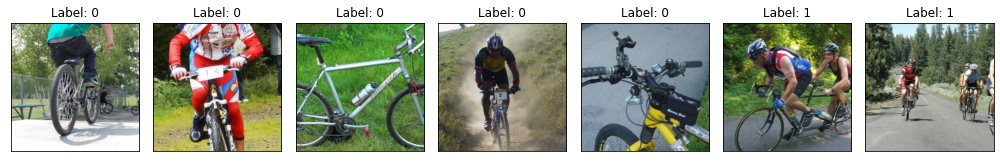

refine data:


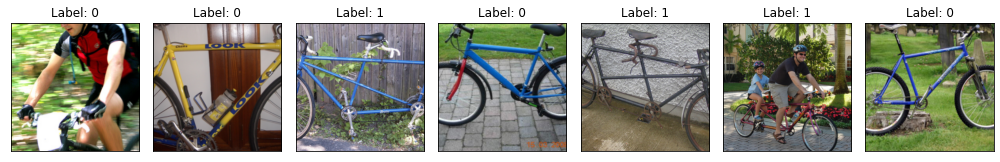

test data:


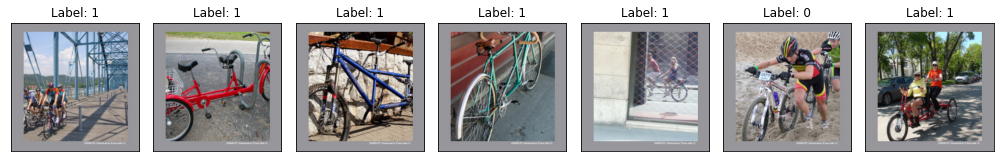

In [5]:
scenario_mb = get_scenario("mtb-bbt", dataset_path=imgnt_path, normalize=False)

datas = []
for split in splits:
    datas.append(scenario_mb.get_data(split))
plot_scenario(*datas)

In [ ]:
scenario_cc = get_scenario("carton-crate", dataset_path=imgnt_path, normalize=False)

datas = []
for split in splits:
    datas.append(scenario_cc.get_data(split))
plot_scenario(*datas)

## Display MNIST task

In [ ]:
mnist_path = "/home/space/datasets/"

In [ ]:
scenario_m = get_scenario("mnist-8", dataset_path=mnist_path, normalize=False)

datas = []
for split in splits:
    datas.append(scenario_m.get_data(split))
plot_scenario(*datas, color_map="gray")

## Display ISIC2019 task

In [ ]:
isic_path = "/home/llorenz/enhanced-regularization-code/data/ISIC2019"

In [ ]:
scenario_i = get_scenario("isic-1", dataset_path=isic_path, normalize=False)

datas = []
for split in splits:
    datas.append(scenario_i.get_data(split))
plot_scenario(*datas, color_map="gray")